In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import pandas as pd
from PIL import Image
import cv2
import sys

sys.path.append('../src')
from utils import return_image_and_mask

In [2]:
!ls ../data/

train.tar.gz       training_dataset   valid.tar.gz       validation_dataset


In [3]:
DATA_DIR = '../data'

In [4]:
# Get full image path by adding filename to base path

# Get the paths
train_paths = np.array([os.path.relpath(i, DATA_DIR).split('.')[0] for i in glob.glob(f'{DATA_DIR}/training_dataset/**/*.jpg')])
val_paths = np.array([os.path.relpath(i, DATA_DIR).split('.')[0] for i in glob.glob(f'{DATA_DIR}/validation_dataset/**/*.jpg')])

print(f"Train length: {len(train_paths)}")
print(f"Val length: {len(val_paths)}")

Train length: 593
Val length: 91


In [5]:
train_paths[0] + '.jpg'

'training_dataset/BM/BM57_1.jpg'

In [6]:
# Try opening an image and corresponding mask

idx = 107

path = train_paths[idx]

print(f"Image path: {path + '.jpg'}")

img, mask = return_image_and_mask(DATA_DIR, path)

Image path: training_dataset/BM/BM52_1.jpg
training_dataset/BM/BM52_1
../data/training_dataset/BM/BM52_1.jpg


In [7]:
img.shape

(600, 800, 3)

In [8]:
mask.shape

(600, 800)

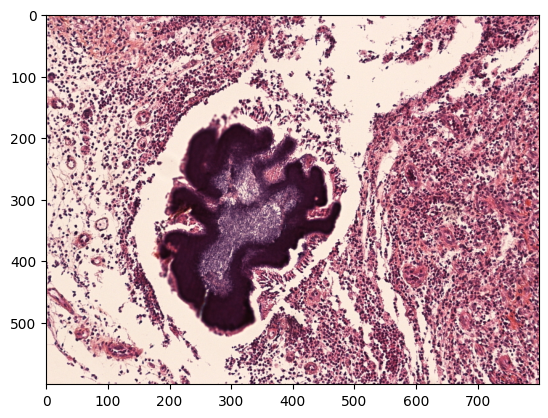

In [9]:
plt.imshow(img)
plt.show()

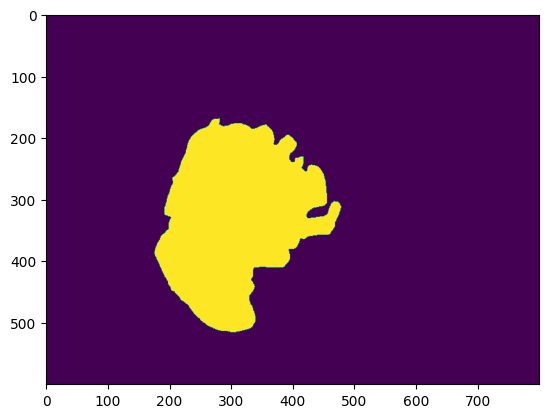

In [10]:
plt.imshow(mask)

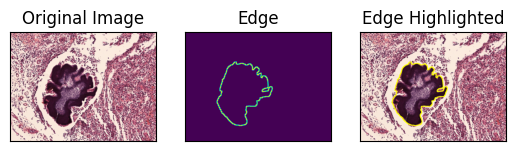

In [11]:
edges = cv2.Canny(mask,0,1)   # canny edge detector

edges = cv2.dilate(edges, np.ones((5, 5)))

img2 = img.copy()
img2[edges == 255] = [255, 255, 0]  # turn edges to yellow

plt.subplot(131),plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(edges)
plt.title('Edge'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img2)
plt.title('Edge Highlighted'), plt.xticks([]), plt.yticks([])

plt.show()

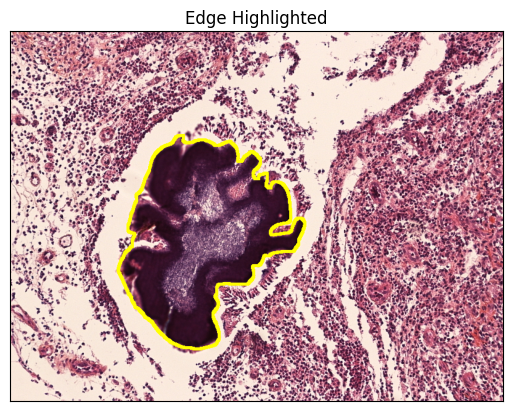

In [12]:
plt.imshow(img2)
plt.title('Edge Highlighted'), plt.xticks([]), plt.yticks([])
plt.show()

In [39]:
np.max(img.flatten())

np.uint8(255)

In [40]:
for i, path in enumerate(train_paths):
  if 'BM37' in path:
    print(f'{i}: {path}')

54: training_dataset/BM/BM37_3
60: training_dataset/BM/BM37_2
85: training_dataset/BM/BM37_1
98: training_dataset/BM/BM37_5
104: training_dataset/BM/BM37_4
121: training_dataset/BM/BM37_6


In [1]:
# Try opening an image and corresponding mask

idx = 178

print(f"Image path: {train_paths[idx]}.jpg")

image_path = f"{train_paths[idx]}.jpg"
mask_path = f"{train_paths[idx]}_mask.tif"

# Load the image and mask
img1 = np.asarray(Image.open(image_path))
mask1 = np.asarray(Image.open(mask_path))

NameError: name 'train_paths' is not defined

In [15]:
# Try opening an image and corresponding mask

idx = 199

print(f"Image path: {train_paths[idx]}.jpg")

image_path = f"{train_paths[idx]}.jpg"
mask_path = f"{train_paths[idx]}_mask.tif"

# Load the image and mask
img2 = np.asarray(Image.open(image_path))
mask2 = np.asarray(Image.open(mask_path))

Image path: data/mycetoma_train/BM/BM37_4.jpg


In [19]:
(img1==img2).all()

True

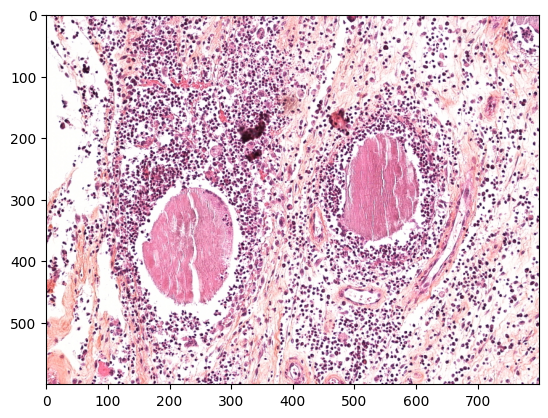

In [16]:
plt.imshow(img1)
plt.show()

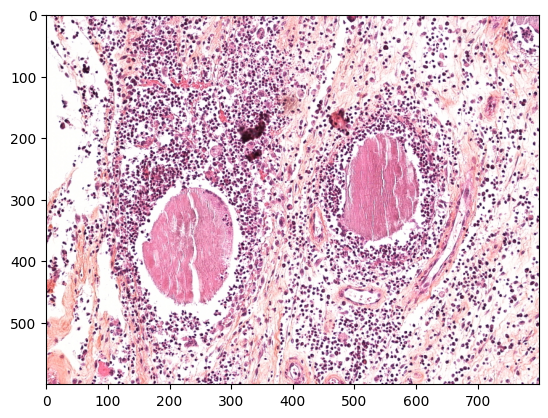

In [17]:
plt.imshow(img2)
plt.show()

In [20]:
new_mask = mask1+mask2

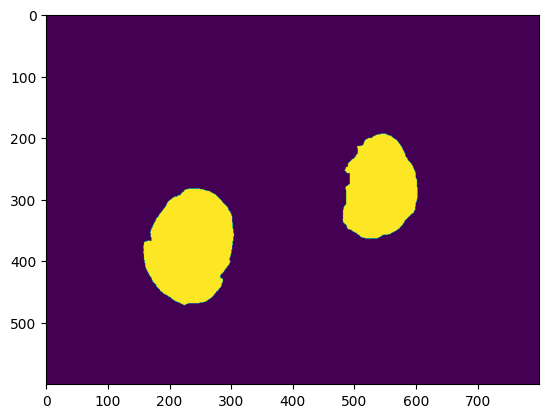

In [21]:
plt.imshow(new_mask)